In [1]:
import pandas as pd
import numpy as np

Loading Data and Exploring Features of Data

In [103]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Label details

In [104]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Features datatypes

In [105]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Pre-Processing Data:1. Handling Missing Values,2.checking for outliers etc

In [106]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
3.identifying objects to be converted into numericals

In [107]:
obj_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_columns.append(i)
obj_columns


['Surname', 'Geography', 'Gender']

In [ ]:
4.feature selection and their involvement

In [108]:
from scipy.stats import chi2_contingency


In [109]:
for col in df.columns:
    if df[col].dtype == 'object':
        dataset = pd.crosstab(df[col],df['Exited'])
        p_val = chi2_contingency(dataset)[1]
        print(f"{col}:: {round(p_val,3)}:: {p_val<0.05}")


Surname:: 0.972:: False
Geography:: 0.0:: True
Gender:: 0.0:: True


we found that the column surname is an important feature so now we just convert the gender and geography to numericaks and drop surname column

In [110]:
df.drop('Surname',axis=1,inplace=True)

In [111]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


converting gender column to numerical using one hot encoding method

In [112]:
encoded_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, encoded_gender], axis=1)

In [113]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [114]:
df.drop('Gender',axis=1,inplace=True)

In [115]:
obj_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_columns.append(i)
obj_columns


['Geography']

In [116]:
encoded_geography = pd.get_dummies(df['Geography'], prefix='Geography')
df = pd.concat([df, encoded_geography], axis=1)

In [117]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,France,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,699,France,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [118]:
df.drop('Geography',axis=1,inplace=True)

In [119]:
obj_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_columns.append(i)
obj_columns


[]

similarly to surname the row number and cust_id cannot affet the customer to close their bank account so these rows also can be removed

In [120]:
col=['CustomerId','RowNumber']
df.drop(col,inplace=True,axis=1)

In [121]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


now we construct the model to perform prediction involving the splitting data primarily
1.make the data seperated as data and labels for variables x and y where x is data and y is for labels

In [122]:
x=df.drop('Exited',axis=1)
y=df['Exited']


splitting data for train and test

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

standardizing data for better convergenc and bringing all features to same scale

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [128]:
import tensorflow as tf

In [141]:
tf.compat.v1.losses.sparse_softmax_cross_entropy


<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

Model

In [142]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(16,activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score

evaluated using different optimizers

In [144]:
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    history=model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1,validation_split=0.1)
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy with {optimizer} optimizer: {accuracy}")
    print(f"Confusion Matrix with {optimizer} optimizer:\n{confusion_matrix(y_test, y_pred)}")


Epoch 1/10
225/225 [==============================] - 2s 4ms/step - loss: 0.4521 - accuracy: 0.8051 - val_loss: 0.3840 - val_accuracy: 0.8375
Epoch 2/10
225/225 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8483 - val_loss: 0.3706 - val_accuracy: 0.8438
Epoch 3/10
225/225 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8593 - val_loss: 0.3550 - val_accuracy: 0.8537
Epoch 4/10
225/225 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8618 - val_loss: 0.3466 - val_accuracy: 0.8550
Epoch 5/10
225/225 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8649 - val_loss: 0.3421 - val_accuracy: 0.8525
Epoch 6/10
225/225 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8661 - val_loss: 0.3434 - val_accuracy: 0.8512
Epoch 7/10
225/225 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8696 - val_loss: 0.3465 - val_accuracy: 0.8562
Epoch 

In [145]:
import matplotlib.pyplot as plt

graphs of accuracy and loss for both train and validation

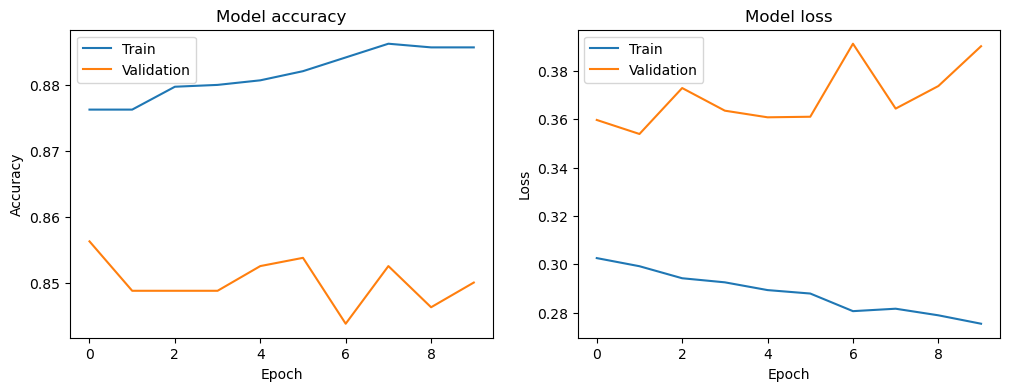

In [146]:
plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

we found that there is a occurence of overfiting so we follow early stopping

In [147]:
from tensorflow.keras.callbacks import EarlyStopping

In [148]:
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1,validation_split=0.1,callbacks=[early_stopping])
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy with {optimizer} optimizer: {accuracy}")
    print(f"Confusion Matrix with {optimizer} optimizer:\n{confusion_matrix(y_test, y_pred)}")


Epoch 1/10
225/225 [==============================] - 2s 3ms/step - loss: 0.2728 - accuracy: 0.8881 - val_loss: 0.3896 - val_accuracy: 0.8512
Epoch 2/10
225/225 [==============================] - 1s 4ms/step - loss: 0.2678 - accuracy: 0.8885 - val_loss: 0.3701 - val_accuracy: 0.8462
Epoch 3/10
225/225 [==============================] - 1s 2ms/step - loss: 0.2631 - accuracy: 0.8882 - val_loss: 0.3955 - val_accuracy: 0.8462
Epoch 4/10
225/225 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8917 - val_loss: 0.3691 - val_accuracy: 0.8525
Epoch 5/10
225/225 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.8942 - val_loss: 0.3858 - val_accuracy: 0.8500
Epoch 6/10
225/225 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8947 - val_loss: 0.4025 - val_accuracy: 0.8525
Epoch 7/10
63/63 [==============================] - 0s 1ms/step

Accuracy with adam optimizer: 0.8615
Confusion Matrix with adam optimizer:
[[1539  

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


and lastly Using l2 reguralization techinque we found accuracy score and confusion Matrix


In [150]:
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1],kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2, restore_best_weights=True)
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1,validation_split=0.1, callbacks=[early_stopping])
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy with {optimizer} optimizer, regularization, and earlystopping: {accuracy}")
    print(f"Confusion Matrix with {optimizer} optimizer, regularization, and early stopping:\n{confusion_matrix(y_test, y_pred)}")





Epoch 1/10
225/225 [==============================] - 4s 5ms/step - loss: 0.6467 - accuracy: 0.7886 - val_loss: 0.5411 - val_accuracy: 0.8037
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.5310 - accuracy: 0.8168 - val_loss: 0.4502 - val_accuracy: 0.8600
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4672 - accuracy: 0.8447 - val_loss: 0.4216 - val_accuracy: 0.8637
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.8510 - val_loss: 0.4087 - val_accuracy: 0.8662
Epoch 5/10
225/225 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8503 - val_loss: 0.3960 - val_accuracy: 0.8600
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8526 - val_loss: 0.3890 - val_accuracy: 0.8600
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8600 - val_loss: 0.3858 - val_accuracy: 0.8625
Epoch 